In [122]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [123]:
data = pd.read_csv("superstore.csv")
data.sample(10)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
1298,Second Class,Corporate,United States,Saint Paul,Minnesota,55106,Central,Technology,Phones,114.950,5,0.0,2.2990
4581,First Class,Home Office,United States,Philadelphia,Pennsylvania,19140,East,Furniture,Furnishings,25.632,3,0.2,3.8448
445,Second Class,Consumer,United States,Detroit,Michigan,48227,Central,Office Supplies,Labels,22.050,7,0.0,10.5840
1488,Standard Class,Home Office,United States,Los Angeles,California,90008,West,Furniture,Furnishings,42.600,3,0.0,16.6140
1214,Standard Class,Corporate,United States,Philadelphia,Pennsylvania,19134,East,Office Supplies,Binders,4.503,1,0.7,-3.6024
1548,Standard Class,Corporate,United States,San Antonio,Texas,78207,Central,Office Supplies,Storage,27.056,2,0.2,2.3674
2846,Standard Class,Home Office,United States,Chicago,Illinois,60653,Central,Office Supplies,Binders,762.594,3,0.8,-1143.8910
5298,First Class,Corporate,United States,San Diego,California,92037,West,Office Supplies,Envelopes,4.080,2,0.0,1.9176
8582,Second Class,Corporate,United States,San Marcos,Texas,78666,Central,Technology,Accessories,20.784,2,0.2,-3.6372
3077,Standard Class,Home Office,United States,Dallas,Texas,75217,Central,Furniture,Chairs,981.372,2,0.3,-140.1960


In [124]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [125]:
data.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64


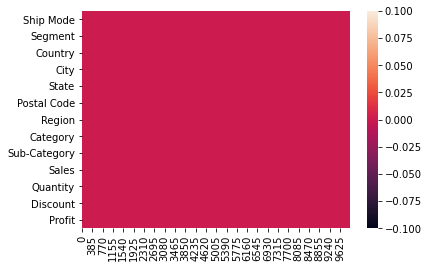

In [126]:
sns.heatmap(data.isnull().T)
print(data.isnull().sum().T)


<AxesSubplot:xlabel='Region', ylabel='Sales'>

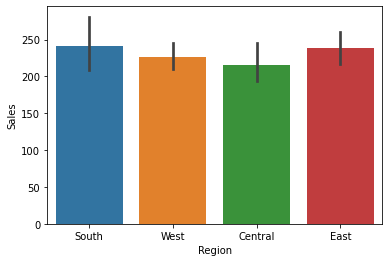

In [127]:
sns.barplot(x = data['Region'],y=data['Sales'])

In [128]:
data['z-score'] = (data.Sales-data.Sales.mean())/data.Sales.std()
data[data['z-score'] > 3].shape

(127, 14)

In [129]:
data = data[data['z-score']<3] ## removed Outliners
data.shape

(9867, 14)

<AxesSubplot:xlabel='Region', ylabel='Sales'>

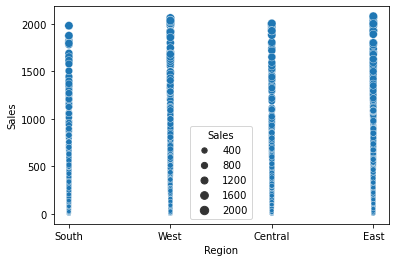

In [130]:
sns.scatterplot(x = data['Region'], y = data['Sales'],size= data['Sales'])

In [131]:
data = data.drop(['z-score','Postal Code','Country'],axis=1)


In [132]:
data

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,Miami,Florida,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,Costa Mesa,California,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,Costa Mesa,California,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,Costa Mesa,California,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


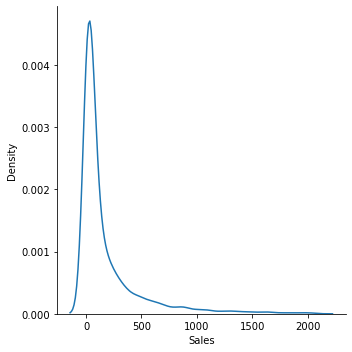

In [133]:
sns.displot(data['Sales'],kind= 'kde')

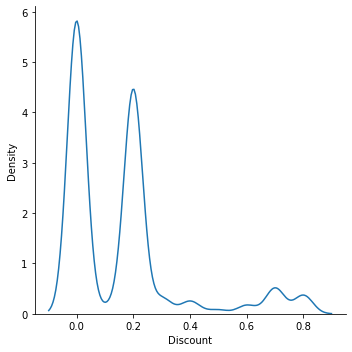

In [134]:
sns.displot(data['Discount'],kind="kde")

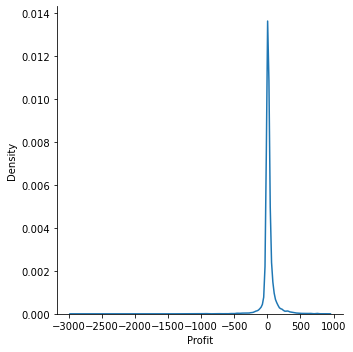

In [135]:
sns.displot(data['Profit'],kind= 'kde')

<AxesSubplot:>

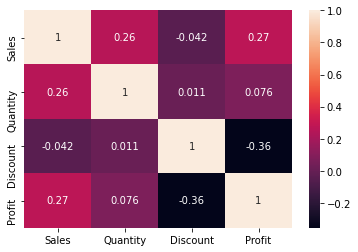

In [136]:
sns.heatmap(data.corr(),annot=True)

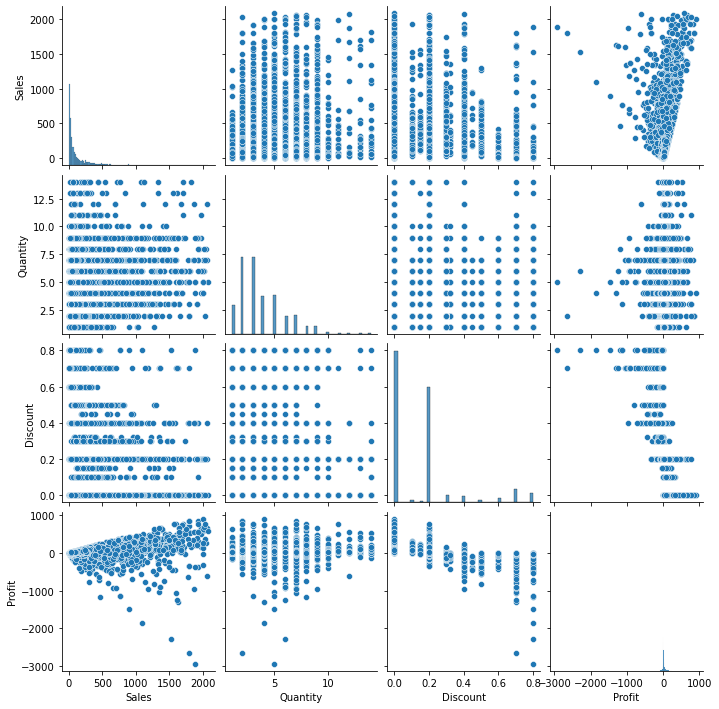

In [137]:
sns.pairplot(data)


<AxesSubplot:xlabel='Category', ylabel='count'>

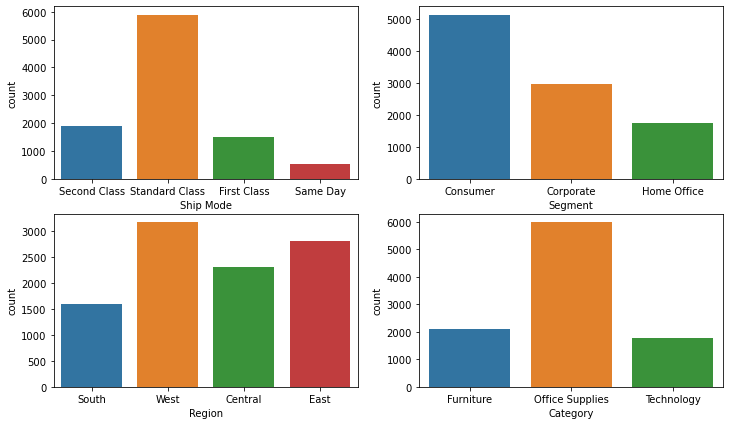

In [138]:
plt.figure(figsize=(12,7))
plt.subplot(221)
sns.countplot(x=data["Ship Mode"])
plt.subplot(222)
sns.countplot(x=data["Segment"])
plt.subplot(223)
sns.countplot(x=data["Region"])
plt.subplot(224)
sns.countplot(x=data["Category"])


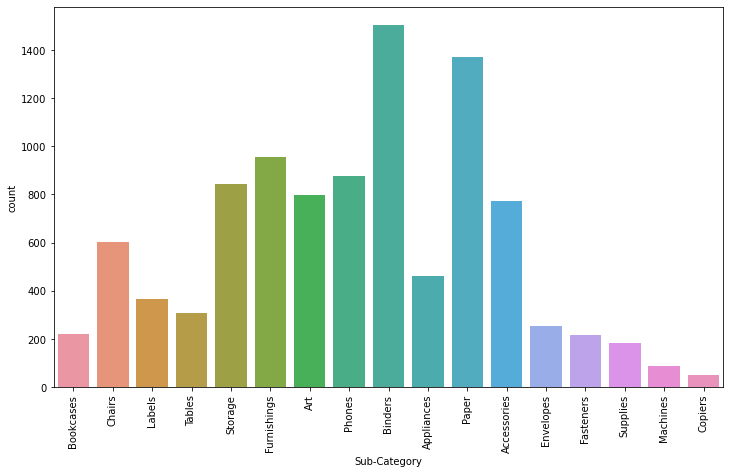

In [139]:
plt.figure(figsize=(12,7))
sns.countplot(x=data["Sub-Category"])
plt.xticks(rotation = 90)
plt.show()

In [140]:
Gp1 = data.groupby(['Category']).Discount.sum().sort_values(ascending = False).reset_index()
Gp2 =data.groupby(['Category']).Profit.sum().sort_values(ascending = False).reset_index()
merge1= pd.merge(Gp1, Gp2, how='right',on='Category')
merge1.rename(columns={'Discount':'Overall_Discount','Profit':'Overall_Profit'},inplace = True)
merge1

,Category,Overall_Discount,Overall_Profit
0,Office Supplies,944.80,90263.5534
1,Technology,235.40,86961.0770
2,Furniture,364.42,14210.0055


([<matplotlib.patches.Wedge at 0x16796c96d60>,
 [Text(-1.1269069081699448, -0.41240855994857273, 'Office Supplies'),
  Text(1.0172470900321668, -0.4185789744135375, 'Technology'),
  Text(0.7426841971327746, 0.8114309479735452, 'Furniture')],
 [Text(-0.6573623630991344, -0.24057165997000074, '61.2%'),
  Text(0.5548620491084545, -0.22831580422556585, '15.2%'),
  Text(0.40510047116333153, 0.442598698894661, '23.6%')])

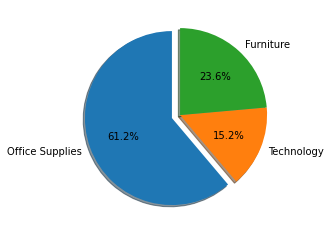

In [141]:
plt.pie(merge1["Overall_Discount"],explode=(0.1,0,0), labels=merge1['Category'], autopct='%1.1f%%',shadow=True,startangle=90)

([<matplotlib.patches.Wedge at 0x16796f98910>,
 [Text(-1.1951970103020721, 0.10725719819661919, 'Office Supplies'),
  Text(1.1380600919647208, -0.38055121478882703, 'Technology'),
  Text(0.30041571499741004, 1.2648123964377465, 'Furniture')],
 [Text(-0.697198256009542, 0.06256669894802785, '47.2%'),
  Text(0.6638683869794203, -0.22198820862681573, '45.4%'),
  Text(0.1848712092291754, 0.7783460901155362, '7.4%')])

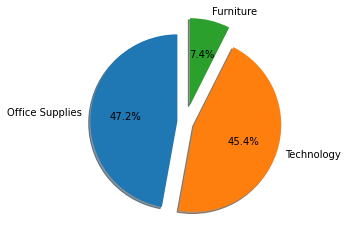

In [146]:
plt.pie(merge1["Overall_Profit"],explode=(0.1,0.1,0.2), labels=merge1['Category'], autopct='%1.1f%%',shadow=True,startangle=90)

In [147]:
Gp3 = data.groupby(['Region']).Discount.sum().sort_values(ascending = False).reset_index()
Gp4 =data.groupby(['Region']).Profit.sum().sort_values(ascending = False).reset_index()
merge2= pd.merge(Gp3, Gp4, how='right',on='Region')
merge2.rename(columns={'Discount':'Overall_Discount','Profit':'Overall_Profit'},inplace = True)
merge2

,Region,Overall_Discount,Overall_Profit
0,West,344.35,83951.7150
1,East,409.80,53824.9307
2,South,235.65,37838.8593
3,Central,554.82,15819.1309


([<matplotlib.patches.Wedge at 0x167970345b0>,
 [Text(-0.7734018730115263, 0.917523592515344, 'West'),
  Text(-0.9454574164935471, -0.7389927425877385, 'East'),
  Text(0.47328090710341786, -1.102726250241358, 'South'),
  Text(1.0844973174828485, 0.513678467888723, 'Central')],
 [Text(-0.4511510925900569, 0.5352220956339506, '22.3%'),
  Text(-0.5515168262879024, -0.4310790998428474, '26.5%'),
  Text(0.2760805291436604, -0.6432569793074588, '15.3%'),
  Text(0.6326234351983283, 0.2996457729350884, '35.9%')])

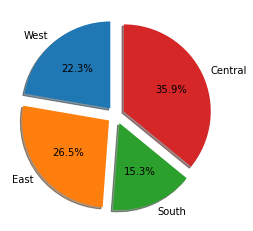

In [149]:
plt.pie(merge2["Overall_Discount"],explode=(0.1,0.1,0.1,0.1), labels=merge2['Region'], autopct='%1.1f%%',shadow=True,startangle=90)

([<matplotlib.patches.Wedge at 0x167970967c0>,
 [Text(-1.1777008459643648, 0.2302622796178729, 'West'),
  Text(0.5723004936449809, -1.054737950854956, 'East'),
  Text(1.090447446934355, 0.5009235125988268, 'South'),
  Text(0.3080379121310545, 1.1597899140318217, 'Central')],
 [Text(-0.6869921601458795, 0.13431966311042584, '43.9%'),
  Text(0.33384195462623883, -0.6152638046653909, '28.1%'),
  Text(0.6360943440450404, 0.2922053823493156, '19.8%'),
  Text(0.17968878207644848, 0.6765441165185627, '8.3%')])

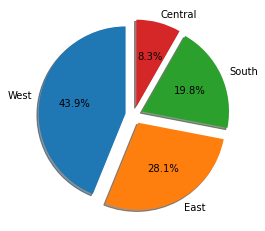

In [150]:
plt.pie(merge2["Overall_Profit"],explode=(0.1,0.1,0.1,0.1), labels=merge2['Region'], autopct='%1.1f%%',shadow=True,startangle=90)

In [151]:
top_10_cities = data.groupby("City")["Profit"].sum().reset_index().sort_values(by="Profit",ascending=False)
top_10_cities.head(10)

,City,Profit
329,New York City,34897.5783
266,Los Angeles,24592.5499
452,Seattle,17581.2251
438,San Francisco,15678.3905
123,Detroit,6854.4448
94,Columbus,5132.7195
437,San Diego,4969.8885
407,Richmond,4872.7471
215,Jackson,4688.6484
93,Columbia,4335.1267


In [152]:

top_10_cities = data.groupby("City")["Discount"].sum().reset_index().sort_values(by="Discount",ascending=False)
top_10_cities.head(10)


,City,Discount
374,Philadelphia,174.10
207,Houston,141.82
80,Chicago,120.10
109,Dallas,56.30
266,Los Angeles,53.15
329,New York City,49.70
94,Columbus,38.50
216,Jacksonville,35.15
438,San Francisco,33.60
452,Seattle,27.00


In [153]:
top_10_sub_categories = data.groupby("Sub-Category")["Profit"].sum().reset_index().sort_values(by="Profit",ascending=False)
top_10_sub_categories.head(10)

,Sub-Category,Profit
0,Accessories,39503.4923
13,Phones,37886.6451
12,Paper,34053.5693
5,Chairs,21989.2644
14,Storage,19864.5829
1,Appliances,14633.8139
6,Copiers,13974.6680
9,Furnishings,13059.1436
7,Envelopes,6964.1767
2,Art,6527.7870


In [154]:
top_10_sub_categories = data.groupby("Sub-Category")["Discount"].sum().reset_index().sort_values(by="Discount",ascending=False)
top_10_sub_categories.head(10)

,Sub-Category,Discount
3,Binders,564.40
13,Phones,136.20
9,Furnishings,132.40
5,Chairs,103.10
12,Paper,102.60
16,Tables,82.15
1,Appliances,77.60
14,Storage,63.20
0,Accessories,60.80
2,Art,59.60


In [156]:
top_10_region = data.groupby("Region")["Sales"].sum().reset_index().sort_values(by="Sales",ascending=False)
top_10_region.head(2)

,Region,Sales
3,West,592610.3555
1,East,506698.1940


- Positive relationship between Profit & Sales, Quantity & Sales.
- Company offering more Discount on Office Sppliers & furniture Category.
- In the Central Rregion company(Store) giving lots of discount but the Output is very less in quantity. 
- Company Provides highest Quantity for Office Suppliers but Sales are not good enough,Quantity should be minimized and provide it to the Furniture category instead of Office Suppliers.